# Proyecto: Introducción a los Sistemas Inteligentes 2022-I
## Clasificación de Canciones en Géneros Musicales
<ul>
<li><h4>Santiago Acosta Meza</h4></li>
</ul>

## Descripción de las Características
<h6><a href="https://www.therecordindustry.io/analyzing-spotify-audio-features/">Fuente de Información</a></h6>

#### *Acousticeness*
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

#### *Danceability*
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

#### *Energy*
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

#### *Instrumentalness*
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

#### *Liveness*
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

#### *Loudness*
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

#### *Speechiness*
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

#### *Tempo*
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

#### *Time Signature*
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

#### *Valence*
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).



## Caracterización de los Datos

In [147]:
import pandas as pd
data = pd.read_csv("SpotifyFeatures.csv")
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


#### Conteo de valores nulos

In [148]:
print('Null Count:', data.isna().sum().sum())

Null Count: 0


#### Tipo de Datos

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

#### Observaciones:
*   No hay campos nulos en el dataset.
*   Campos discretos (Dtype=='object'):
    *   artist_name
    *   track_name
    *   track_id
    *   key
    *   mode
    *   time_signature

#### Valores Duplicados
En los comentarios del dataset se notifica que hay canciones que pertenecen a múltiples géneros. Estas canciones tienen las mismas características, pero diferentes géneros.

In [150]:
duplicated = data[data.duplicated(subset = 'track_id', keep='first')]
data[data['track_id'] == duplicated['track_id'].iloc[0]]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
77710,Children’s Music,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
93651,Indie,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
113770,Pop,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


In [151]:
print('Porcentage:', len(duplicated)/len(data), "%")

Porcentage: 0.24041680094532172 %


Al rededor del 24% de los datos están duplicados.

Se crearán 3 datasets: 
<ol>
    <li>Se mantienen las canciones con multiples clases</li>
    <li>Se eliminan completamente las canciones duplicadas</li>
    <li>Se toma aleatoriamente una clase (Aleatoriamente para mantener el balance de clases, dado el orden del dataset)</li>
</ol>

In [152]:
import numpy as np

# Mantener las multiples clases para una canción
dataWithDuplicate = data

# Eliminar las canciones que pertenezcan a multiples clases
dataWithoutDuplicates = data.drop_duplicates(subset='track_id').reset_index(drop=True)

# Mantener una clase al azar de la canción
idx = np.random.permutation(np.arange(len(data)))
dataWithOneDuplicate = data.iloc[idx].drop_duplicates(subset='track_id', ).reset_index(drop=True)

## Eliminación de Features Innecesarias

Se asume que el *artist_name*, *track_name* y *track_id* no inciden en el género de una canción

In [153]:
dataWithDuplicate = dataWithDuplicate.drop(columns=['artist_name', 'track_name', 'track_id']).reset_index(drop=True)
dataWithDuplicate.head()

dataWithoutDuplicates = dataWithoutDuplicates.drop(columns=['artist_name', 'track_name', 'track_id']).reset_index(drop=True)

dataWithOneDuplicate = dataWithOneDuplicate.drop(columns=['artist_name', 'track_name', 'track_id']).reset_index(drop=True)

Características como *duration_ms*, *loudness* y *key* se estudiaran para definir que tan pertinentes son.

## Conversión numerica de características discretas

Campos de tipo object se enlistan a continuación:

In [154]:
dataWithDuplicate.select_dtypes(include='object').head()

,genre,key,mode,time_signature
0,Movie,C#,Major,4/4
1,Movie,F#,Minor,4/4
2,Movie,C,Minor,5/4
3,Movie,C#,Major,4/4
4,Movie,F,Major,4/4


##### *Key*
Toma 12 posibles valores discretos. Por lo cual se asociaran a números entre 1 y 12.

In [155]:
print( dataWithDuplicate['key'].unique().tolist() )
mapping = {
    'C' : 1,
    'C#' : 2,
    'D' : 3,
    'D#' : 4,
    'E' : 5,
    'F' : 6,
    'F#' : 7,
    'G' : 8,
    'G#' : 9,
    'A' : 10,
    'A#' : 11,
    'B' : 12
}
dataWithDuplicate['key'] = dataWithDuplicate['key'].replace(mapping).astype(int)
print( dataWithDuplicate['key'].unique().tolist() )

dataWithoutDuplicates['key'] = dataWithoutDuplicates['key'].replace(mapping).astype(int)

dataWithOneDuplicate['key'] = dataWithOneDuplicate['key'].replace(mapping).astype(int)

['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B']
[2, 7, 1, 6, 8, 5, 4, 9, 3, 11, 10, 12]


##### *Mode*
Toma 2 posibles valores discretos opuestos. Por lo cual se representan como una variable binaria

In [156]:
print( dataWithDuplicate['mode'].unique().tolist() )
mapping = {
    'Major':1,
    'Minor':0
}
dataWithDuplicate['mode'].replace(mapping, inplace=True)
print( dataWithDuplicate['mode'].unique().tolist() )

dataWithoutDuplicates['mode'].replace(mapping, inplace=True)

dataWithOneDuplicate['mode'].replace(mapping, inplace=True)

['Major', 'Minor']
[1, 0]


##### *Time Signature*
Toma 5 posibles valores discretos que comparten el mismo "denominador". Por lo cual se pueden representar solo con el numerador

In [157]:
print( dataWithDuplicate['time_signature'].unique().tolist() )
def first_char(x):return int(x[0])
dataWithDuplicate['time_signature'] = dataWithDuplicate['time_signature'].apply(first_char)
print( dataWithDuplicate['time_signature'].unique().tolist() )

dataWithoutDuplicates['time_signature'] = dataWithoutDuplicates['time_signature'].apply(first_char)

dataWithOneDuplicate['time_signature'] = dataWithOneDuplicate['time_signature'].apply(first_char)

['4/4', '5/4', '3/4', '1/4', '0/4']
[4, 5, 3, 1, 0]


In [158]:
dataWithDuplicate.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390


In [159]:
dataWithDuplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   popularity        232725 non-null  int64  
 2   acousticness      232725 non-null  float64
 3   danceability      232725 non-null  float64
 4   duration_ms       232725 non-null  int64  
 5   energy            232725 non-null  float64
 6   instrumentalness  232725 non-null  float64
 7   key               232725 non-null  int64  
 8   liveness          232725 non-null  float64
 9   loudness          232725 non-null  float64
 10  mode              232725 non-null  int64  
 11  speechiness       232725 non-null  float64
 12  tempo             232725 non-null  float64
 13  time_signature    232725 non-null  int64  
 14  valence           232725 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 26.6+ MB


## Matriz de Correlación

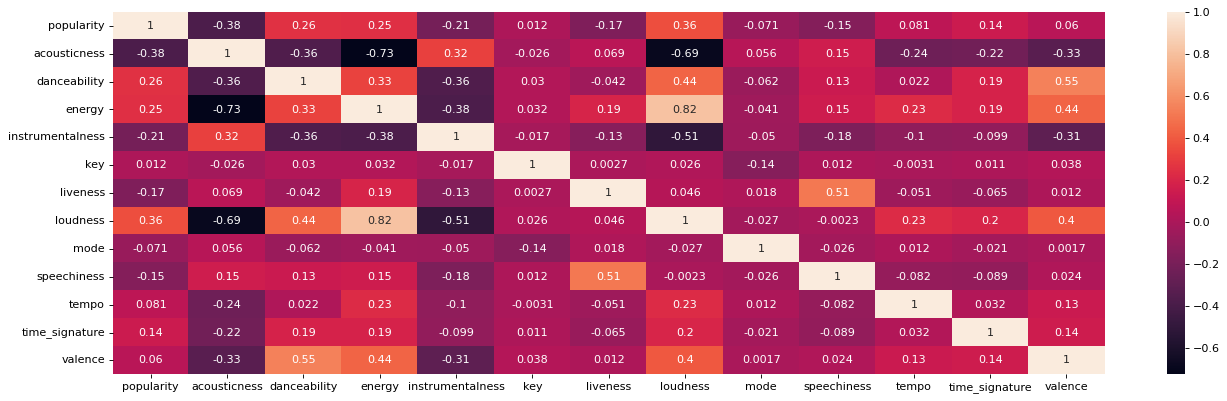

In [160]:
### Fuente: https://datatofish.com/correlation-matrix-pandas/
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)

temp = dataWithDuplicate.drop(columns=['duration_ms']).reset_index(drop=True)

corrMatrix = temp.corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

#### Observación
*   Correlación positiva alta entre *energy* y *loudness*
*   Correlación negativa alta entre *energy* y *acousticness*
*   Correlación negativa alta entre *loudness* y *acousticness*

## Distribución de Clases (Géneros)

### Dataset con duplicados

Comedy              0.041598
Soundtrack          0.041448
Indie               0.041005
Jazz                0.040567
Pop                 0.040331
Electronic          0.040292
Children’s Music    0.040189
Folk                0.039957
Hip-Hop             0.039940
Rock                0.039841
Alternative         0.039802
Classical           0.039772
Rap                 0.039669
World               0.039085
Soul                0.039055
Blues               0.038771
R&B                 0.038638
Anime               0.038397
Reggaeton           0.038359
Ska                 0.038131
Reggae              0.037688
Dance               0.037387
Country             0.037228
Opera               0.035578
Movie               0.033542
Children's Music    0.023216
A Capella           0.000511
Name: genre, dtype: float64


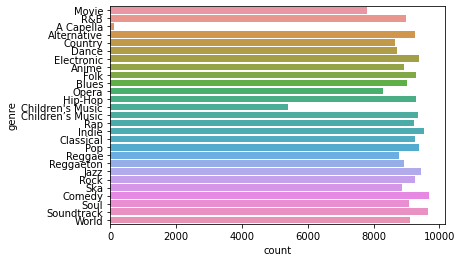

In [161]:
print(dataWithDuplicate['genre'].value_counts()/len(dataWithDuplicate))
sn.countplot(y="genre", data=dataWithDuplicate)

### Dataset sin duplicados

Comedy              0.054725
Electronic          0.051755
Alternative         0.051450
Anime               0.050545
Classical           0.049278
Reggae              0.049142
Reggaeton           0.048361
Blues               0.048061
Soundtrack          0.047971
Opera               0.046839
Folk                0.045527
Jazz                0.045476
Ska                 0.045352
Dance               0.045154
World               0.045103
Movie               0.044135
Hip-Hop             0.041935
Country             0.041765
Children's Music    0.030559
R&B                 0.030282
Soul                0.025060
Indie               0.018770
Pop                 0.013673
Rock                0.012598
Rap                 0.008237
Children’s Music    0.007575
A Capella           0.000673
Name: genre, dtype: float64


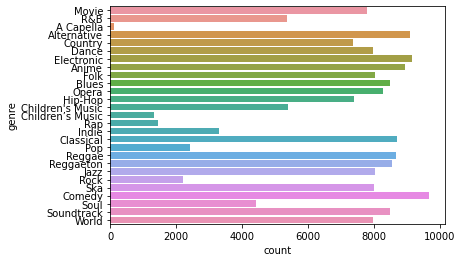

In [162]:
print(dataWithoutDuplicates['genre'].value_counts()/len(dataWithoutDuplicates))
sn.countplot(y="genre", data=dataWithoutDuplicates)

### Dataset con clase aleatoria

Comedy              0.054725
Soundtrack          0.050980
Anime               0.049515
Electronic          0.049425
Reggaeton           0.049351
Classical           0.048780
World               0.047699
Ska                 0.047699
Reggae              0.046489
Jazz                0.046443
Opera               0.045708
Blues               0.045069
Movie               0.043168
Country             0.041918
Soul                0.036335
Folk                0.036006
Children's Music    0.030559
Dance               0.028545
R&B                 0.028013
Hip-Hop             0.027657
Indie               0.027114
Rock                0.025875
Alternative         0.024483
Pop                 0.024127
Rap                 0.023482
Children’s Music    0.020161
A Capella           0.000673
Name: genre, dtype: float64


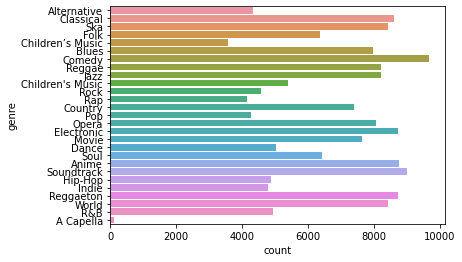

In [163]:
print(dataWithOneDuplicate['genre'].value_counts()/len(dataWithOneDuplicate))
sn.countplot(y="genre", data=dataWithOneDuplicate)

#### Observación
*  La clase 'A Capella' tiene una baja frecuencia
*  La clase 'Children's Music' esta duplicada

Estas clases serán eliminadas, puesto que no se cuenta con muchos datos o están duplicadas.


In [164]:
dataWithDuplicate = dataWithDuplicate[dataWithDuplicate.genre != 'A Capella']
dataWithDuplicate = dataWithDuplicate[dataWithDuplicate.genre != "Children's Music"]

dataWithoutDuplicates = dataWithoutDuplicates[dataWithoutDuplicates.genre != 'A Capella']
dataWithoutDuplicates = dataWithoutDuplicates[dataWithoutDuplicates.genre != "Children's Music"]

dataWithOneDuplicate = dataWithOneDuplicate[dataWithOneDuplicate.genre != 'A Capella']
dataWithOneDuplicate = dataWithOneDuplicate[dataWithOneDuplicate.genre != "Children's Music"]

### Dataset con duplicados

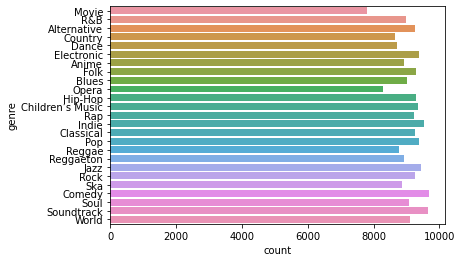

In [165]:
sn.countplot(y="genre", data=dataWithDuplicate)

### Dataset sin duplicadas

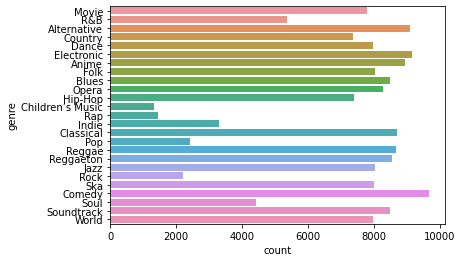

In [166]:
sn.countplot(y="genre", data=dataWithoutDuplicates)

### Dataset con clase aleatoria

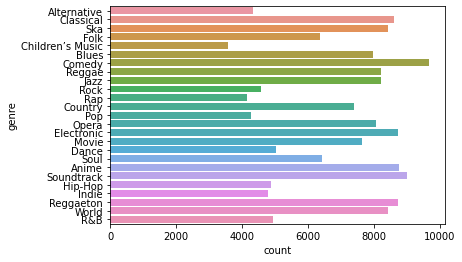

In [167]:
sn.countplot(y="genre", data=dataWithOneDuplicate)

## Exportar Datos

In [168]:
dataWithDuplicate.to_csv('cleanSpotifyFeatureWithDuplicates.csv')
dataWithoutDuplicates.to_csv('cleanSpotifyFeatureWithoutDuplicates.csv')
dataWithOneDuplicate.to_csv('cleanSpotifyFeatureWithRandomDuplicate.csv')